# EDA para información entregada por Sernapesca

### Import libreries

In [2]:
import logging
import subprocess
import os   
import pandas as pd
import seaborn as sns

### Reading file "Ingresos"

In [3]:
reporte_plantas_raw = pd.read_excel("../data/datos_nelson/Reporte de Plantas.xlsx")

In [4]:
reporte_plantas_raw.head()

,Año Declaración,Mes Declaración,Región Agente,Tipo Agente,Código Agente,Nombre Agente,Fecha Declaración,Nº Declaración,idStock,Tipo Item,...,utilizado,Toneladas Rest,Unidades Rest,Tipo Declaración,idBodega,Nombre Bodega,Tipo Bodega,Dirección Bodega,Ciudad Bodega,Región Bodega
0,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607070,4412221,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
1,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607070,4412222,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
2,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607070,4412223,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
3,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607071,4412225,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
4,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607071,4412226,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION


In [5]:
reporte_plantas_raw.columns.to_list()

['Año Declaración',
 'Mes Declaración',
 'Región Agente',
 'Tipo Agente',
 'Código Agente',
 'Nombre Agente',
 'Fecha Declaración',
 'Nº Declaración',
 'idStock',
 'Tipo Item',
 'Código Item',
 'Nombre Item',
 'Fecha Item',
 'Estado Recurso',
 'Tipo Origen',
 'Código Origen',
 'Nombre Origen',
 'Folio Origen',
 'Tipo Ult. Proveedor',
 'Código Ult. Proveedor',
 'Nombre Ult. Proveedor',
 'Folio Ult. Proveedor',
 'Fecha Ult. Proveedor',
 'Toneladas Abastecidas',
 'Unidades Abastecidas',
 'utilizado',
 'Toneladas Rest',
 'Unidades Rest',
 'Tipo Declaración',
 'idBodega',
 'Nombre Bodega',
 'Tipo Bodega',
 'Dirección Bodega',
 'Ciudad Bodega',
 'Región Bodega']

In [6]:
reporte_plantas_raw.info

<bound method DataFrame.info of        Año Declaración Mes Declaración         Región Agente Tipo Agente  \
0                 2021            ene.            III REGION      Planta   
1                 2021            ene.            III REGION      Planta   
2                 2021            ene.            III REGION      Planta   
3                 2021            ene.            III REGION      Planta   
4                 2021            ene.            III REGION      Planta   
...                ...             ...                   ...         ...   
54206             2022            jun.  REGION METROPOLITANA      Planta   
54207             2022            jun.  REGION METROPOLITANA      Planta   
54208             2022            jun.  REGION METROPOLITANA      Planta   
54209             2022            jun.  REGION METROPOLITANA      Planta   
54210             2021            jun.            XIV REGION      Planta   

       Código Agente                                   

In [8]:
reporte_plantas_raw.describe()

,Codigo Centro,Año,Mes,Región,N° Declaración,Cod. Especie,Unidades,Kilos,Cod. Origen
count,64054.000000,64054.000000,64054.000000,64054.0,6.405400e+04,64054.000000,5.619500e+04,6.405400e+04,63083.000000
mean,206234.684423,2021.288631,5.426952,10.0,1.272773e+06,313.515300,3.484208e+04,2.398674e+04,94518.350824
std,174736.900218,0.453130,3.164148,0.0,1.593380e+05,53.348789,2.980422e+05,2.514386e+06,30047.561236
min,100009.000000,2021.000000,1.000000,10.0,1.606180e+05,122.000000,0.000000e+00,0.000000e+00,1.000000
25%,101851.000000,2021.000000,3.000000,10.0,1.265793e+06,301.000000,4.010000e+03,6.220000e+02,100205.000000
50%,103452.000000,2021.000000,5.000000,10.0,1.307780e+06,302.000000,8.881000e+03,1.301000e+03,101866.000000
75%,500014.000000,2022.000000,8.000000,10.0,1.366037e+06,302.000000,1.680000e+04,9.750000e+03,103941.000000
max,810276.000000,2022.000000,12.000000,10.0,1.423360e+06,495.000000,4.000000e+07,6.362615e+08,810248.000000


In [48]:
reporte_plantas_raw.duplicated().sum()

3034

In [50]:
reporte_plantas_raw.isnull().sum()

ACS                22195
Codigo Centro          0
Propietario            0
Nombre Sector         13
Tipo Cultivo           0
Tipo Agua              0
Año                    0
Mes                    0
Región                 0
Provincia              0
Comuna                 0
N° Declaración         0
Cod. Especie           0
Especie                0
Etapa                  0
Unidades            7859
Kilos                  0
Origen                 0
Cod. Origen          971
Nombre Origen        971
Tipo Especie           0
Sistema Ingreso        0
dtype: int64

In [51]:
reporte_plantas_raw.dtypes

ACS                 object
Codigo Centro        int64
Propietario         object
Nombre Sector       object
Tipo Cultivo        object
Tipo Agua           object
Año                  int64
Mes                  int64
Región               int64
Provincia           object
Comuna              object
N° Declaración       int64
Cod. Especie         int64
Especie             object
Etapa               object
Unidades           float64
Kilos              float64
Origen              object
Cod. Origen        float64
Nombre Origen       object
Tipo Especie        object
Sistema Ingreso     object
dtype: object

In [10]:
reporte_plantas_raw.columns.to_list()

['ACS',
 'Codigo Centro',
 'Propietario',
 'Nombre Sector',
 'Tipo Cultivo',
 'Tipo Agua',
 'Año',
 'Mes',
 'Región',
 'Provincia',
 'Comuna',
 'N° Declaración',
 'Cod. Especie',
 'Especie',
 'Etapa',
 'Unidades',
 'Kilos',
 'Origen',
 'Cod. Origen',
 'Nombre Origen',
 'Tipo Especie',
 'Sistema Ingreso']

In [16]:
reporte_plantas_raw['Especie'].unique().tolist()

['TRUCHA ARCOIRIS',
 'SALMON DEL ATLANTICO',
 'SALMON PLATEADO O COHO',
 'SALMON REY',
 'PELILLO',
 'OSTRA CHILENA',
 'CHORITO',
 'OSTRA DEL PACIFICO',
 'ABALON ROJO',
 'CHOLGA',
 'ESTURION BLANCO',
 'CHORO',
 'PULPO DEL SUR',
 'OSTION DEL NORTE',
 'LECHUGUILLA',
 'HUIRO',
 'LUGA-ROJA',
 'ESTURION DE SIBERIA']

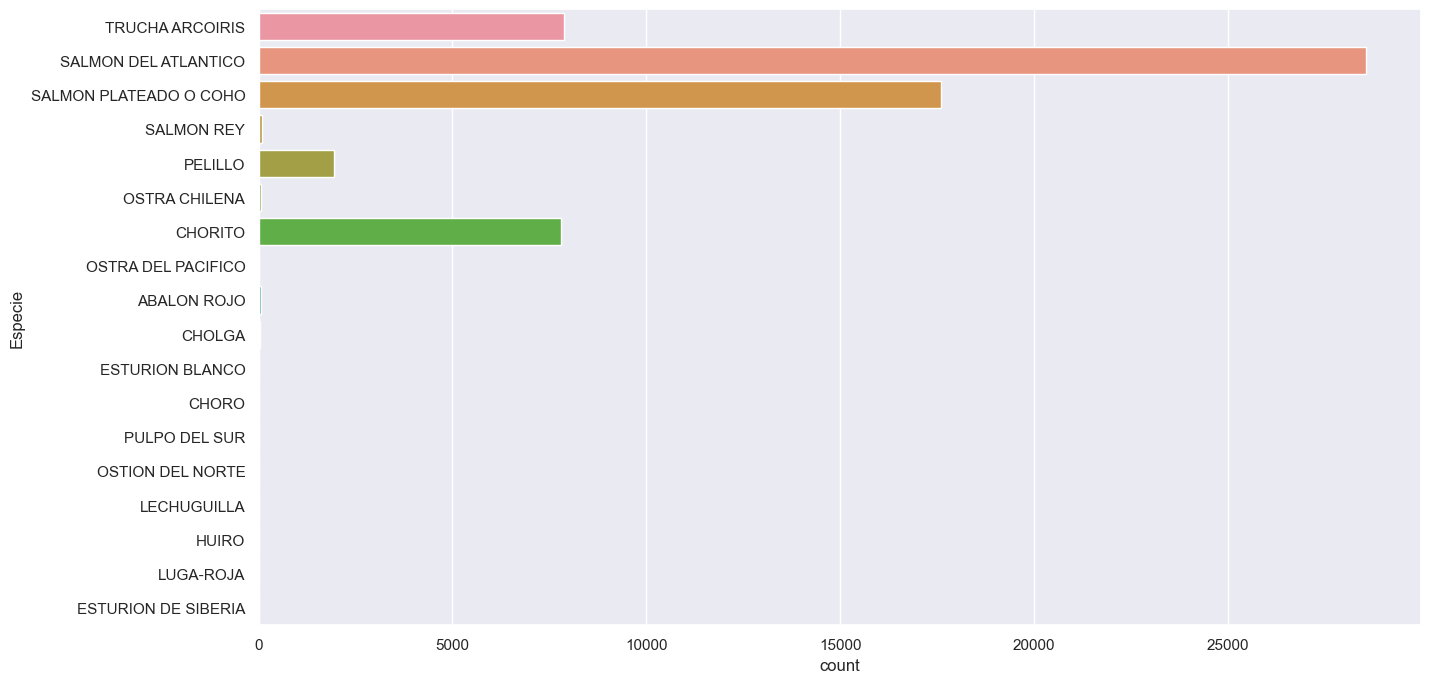

In [42]:
def count_clases(column_name):
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(y=column_name, data=reporte_plantas_raw)
    sns.set(rc = {'figure.figsize':(25,8)})
    #for item in ax.get_xticklabels():
    #    item.set_rotation(90)

count_clases('Especie')

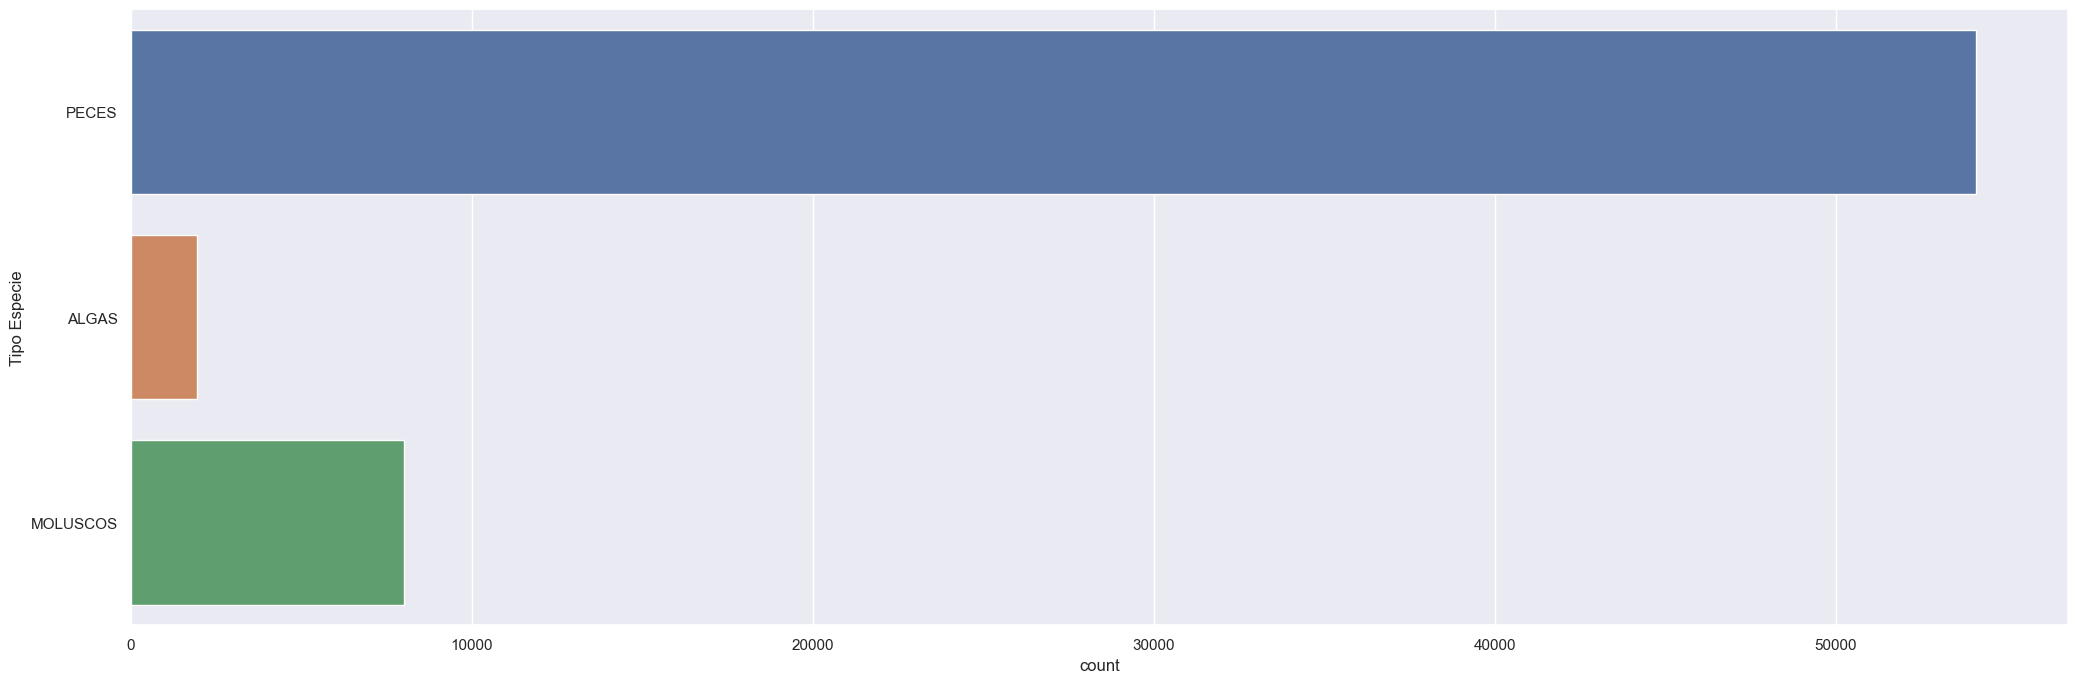

In [55]:
count_clases('Tipo Especie')

In [58]:
reporte_plantas_raw['Origen'].unique().tolist()

['Declarar Existencias de Especies de Cultivo con Aut. Movimiento',
 'Declarar Existencias de Especies de Cultivo por Importación o  Autoabastecimiento',
 'Ingresos por diferencia',
 'Otros',
 'Centro de Cultivo',
 'Área de Manejo',
 'Comercializadora']

In [59]:
reporte_plantas_raw.head()

,ACS,Codigo Centro,Propietario,Nombre Sector,Tipo Cultivo,Tipo Agua,Año,Mes,Región,Provincia,...,Cod. Especie,Especie,Etapa,Unidades,Kilos,Origen,Cod. Origen,Nombre Origen,Tipo Especie,Sistema Ingreso
0,modif descanso 2,500014,RIO DULCE S.A.,"SAN ANTONIO, SEIS SECTORES",ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,311,TRUCHA ARCOIRIS,ADULTOS,24146.0,82555.0,Declarar Existencias de Especies de Cultivo co...,120191.0,AUSTRALIS MAR S.A.,PECES,SIFA
1,modif descanso 2,500014,RIO DULCE S.A.,"SAN ANTONIO, SEIS SECTORES",ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,311,TRUCHA ARCOIRIS,ADULTOS,24172.0,82644.0,Declarar Existencias de Especies de Cultivo co...,120191.0,AUSTRALIS MAR S.A.,PECES,SIFA
2,modif descanso 2,500014,RIO DULCE S.A.,"SAN ANTONIO, SEIS SECTORES",ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,301,SALMON DEL ATLANTICO,ADULTOS,13002.0,87113.0,Declarar Existencias de Especies de Cultivo co...,110340.0,COOKE AQUACULTURE CHILE S.A.,PECES,SIFA
3,ACS 7,500035,MAINSTREAM CHILE S.A.,"PUERTO FERNANDEZ, QUEMCHI",ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,301,SALMON DEL ATLANTICO,ADULTOS,36908.0,235.0,Declarar Existencias de Especies de Cultivo co...,110758.0,CERMAQ CHILE S.A.,PECES,SIFA
4,ACS 10 B,500019,ANTARFOOD S.A.,CANAL YAL,ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,302,SALMON PLATEADO O COHO,ADULTOS,9084.0,35.0,Declarar Existencias de Especies de Cultivo co...,110591.0,EXPORTADORA LOS FIORDOS LTDA.,PECES,SIFA


In [76]:
#len(reporte_plantas_raw)
q_centros_ingresos = len(reporte_plantas_raw['Codigo Centro'].unique().tolist())
q_centros_origen = len(reporte_plantas_raw['Cod. Origen'].unique().tolist())
print(f'En total existen {q_centros_ingresos} lugares de ingresos y {q_centros_origen} lugares de origen ' )

En total existen 1211 lugares de ingresos y 935 lugares de origen 
